# Lab 03



- Write a python code to demonstrate the confusion matrix, accuracy, other metrics with plots in sklearn. You are allowed to use any tabular data set from kaggle.

- Write a python code to demonstrate the use of linear regression and metrics to compute error illustrating with plots. You can try to use dataset from kaggle like student performance data set or salary and experience dataset. 

- Show the illustrations using the plots to demonstrate the probability distribution plots as per the dataset you consider?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Checking if NEAR_BAY is binary or not

In [3]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Converting ocean_proximity to numerical

In [4]:
def convert_ocean_proximity_to_numerical(location: str) -> int:
    if location == 'NEAR BAY':
        return 0
    elif location == '<1H OCEAN':
        return 1
    elif location == 'INLAND':
        return 2
    elif location == 'NEAR OCEAN':
        return 3
    else:
        return 4
    
df['ocean_proximity'] = df['ocean_proximity'].apply(lambda x: convert_ocean_proximity_to_numerical(x))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


Checking for null values

In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


/home/yodenharsh/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


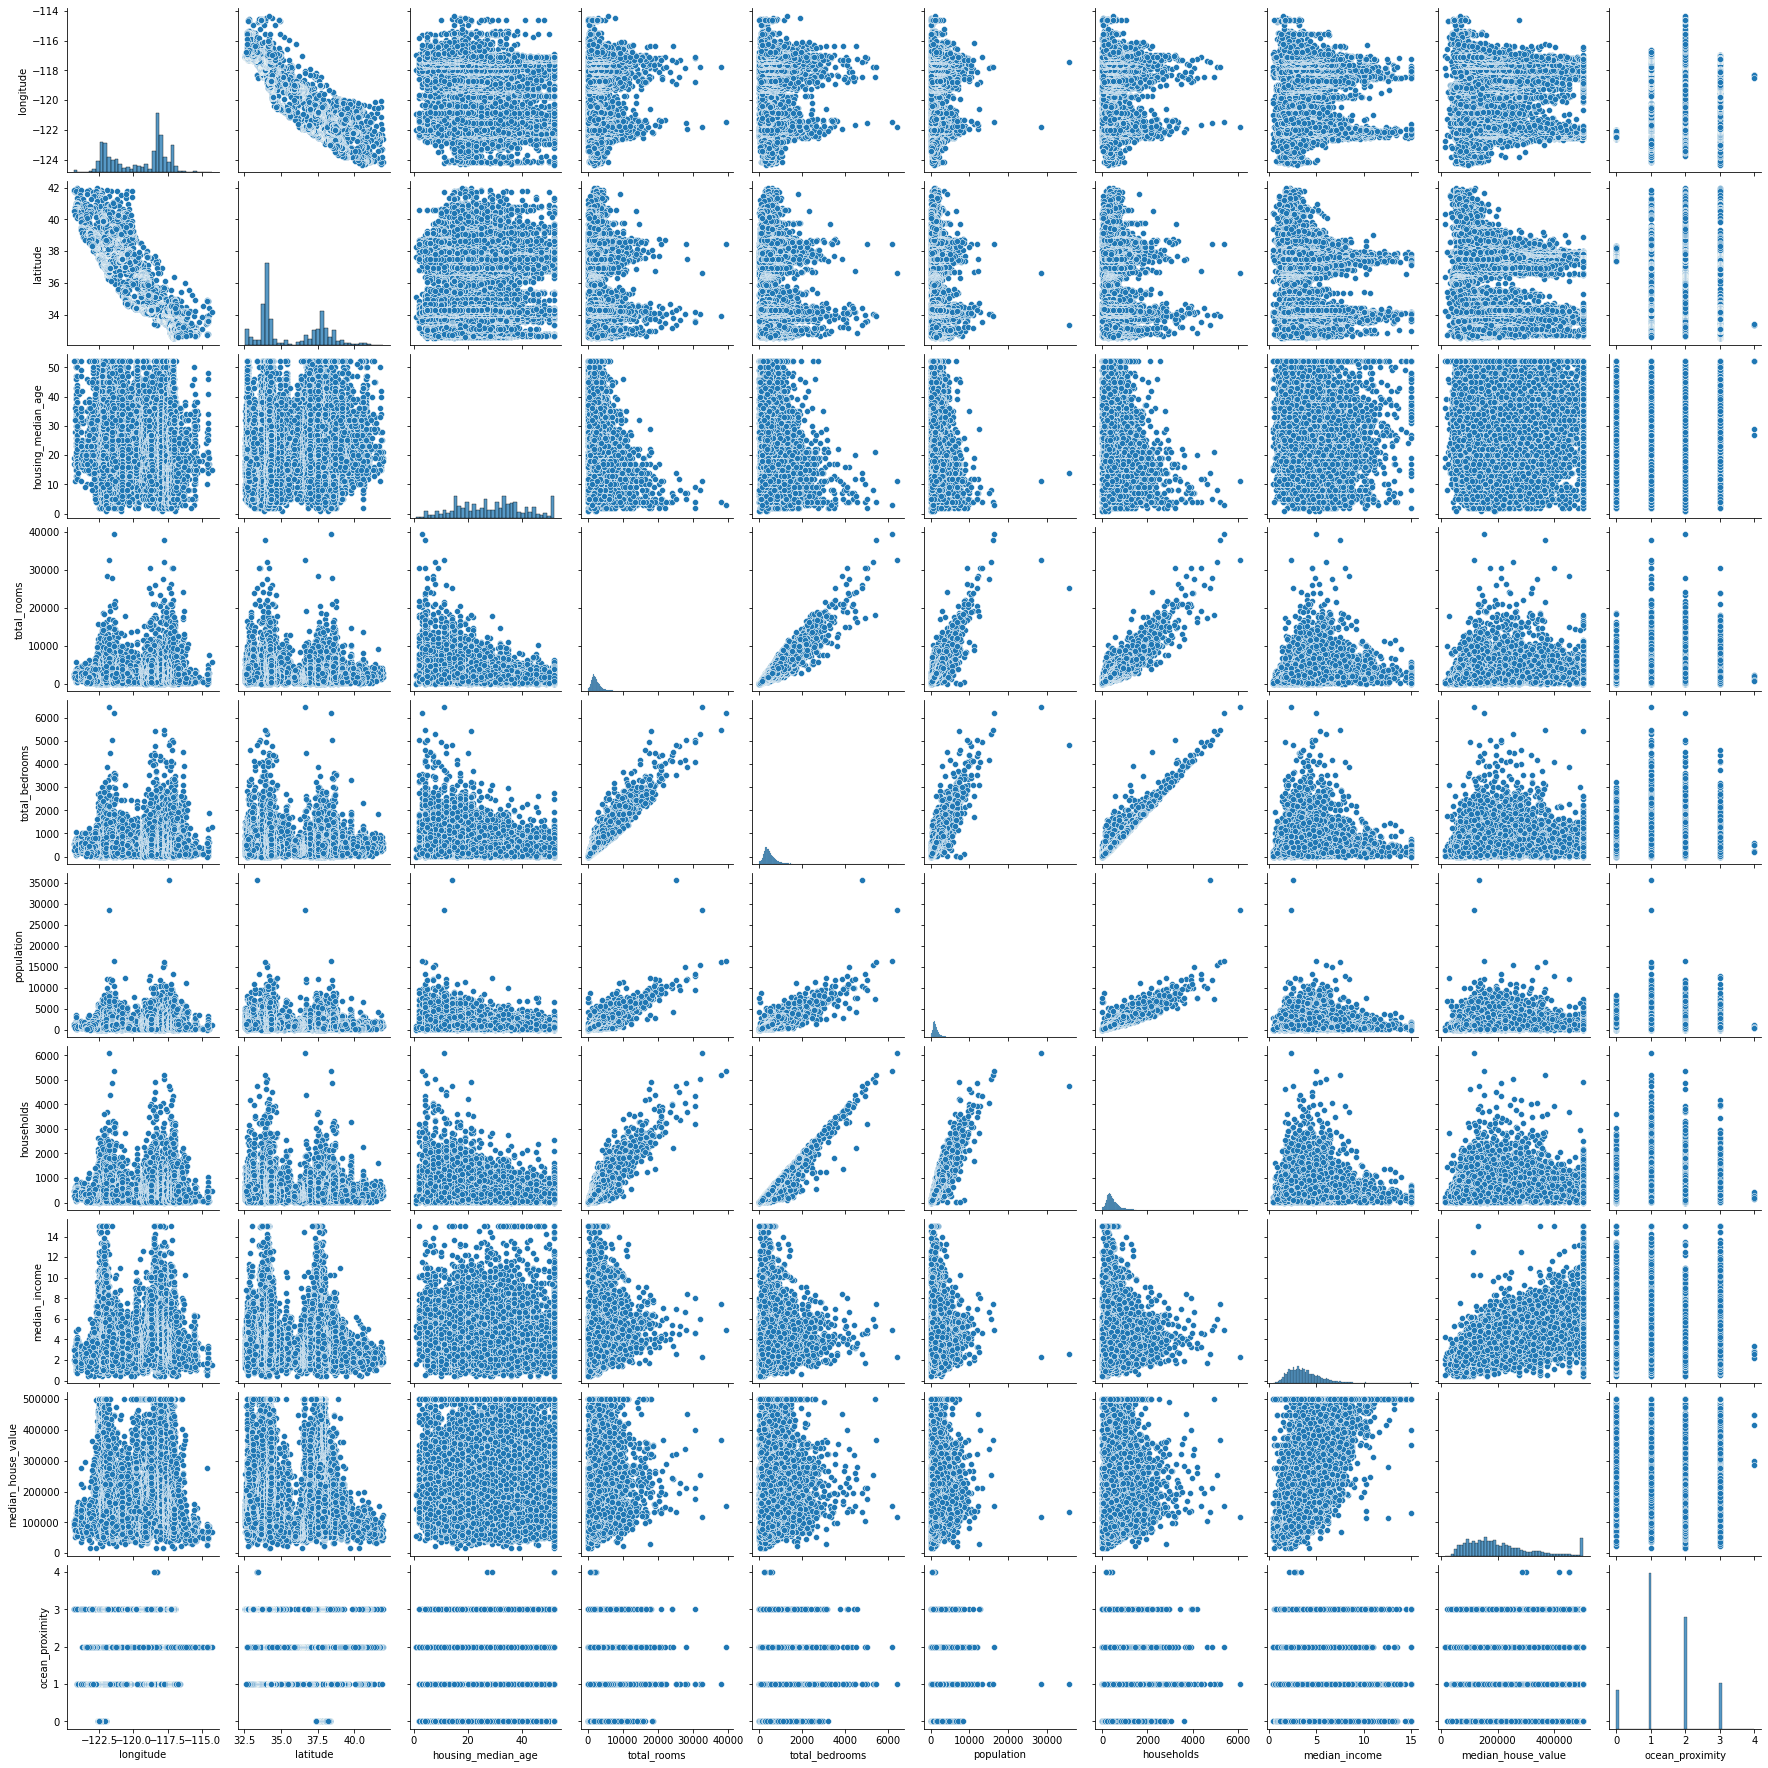

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

Checking for outliers

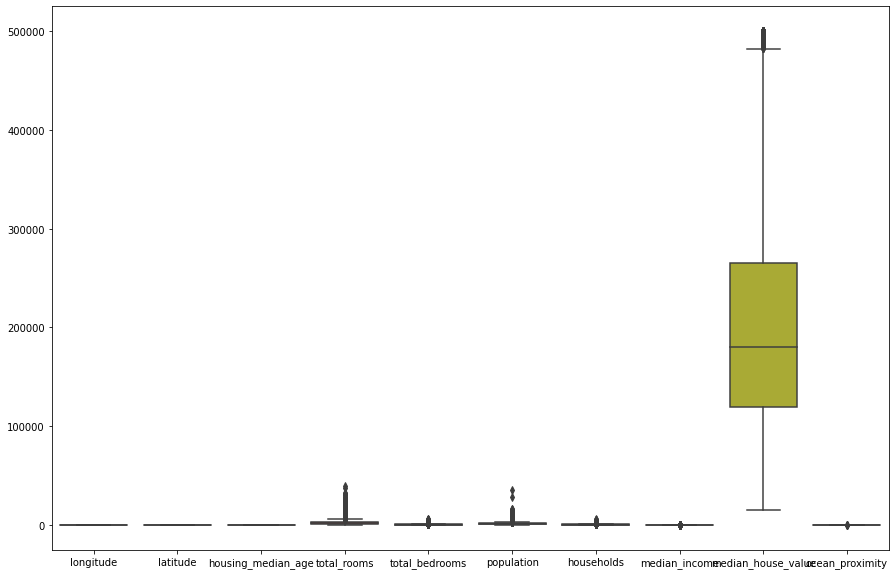

In [9]:
plt.figure(figsize=[15,10])
sns.boxplot(df)


plt.show()

Splitting and applying model for finding correlation between age and expenses

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['total_rooms']]
y =df['households']

print(type(X))
print(type(y))

x_train,x_test, y_train,y_test = train_test_split(X,y,shuffle=True, train_size=0.8)

model = LinearRegression()

print(type(x_train))
print(type(y_train))

model.fit(x_train, y_train)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


LinearRegression()

Applying metrics to measure error

In [11]:
from sklearn.metrics import mean_squared_error,r2_score

predictions = model.predict(x_test)


rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('R2 error: ',r2)
print('RMSE error: ',rmse)

R2 error:  0.845799521734764
RMSE error:  21747.899797449587


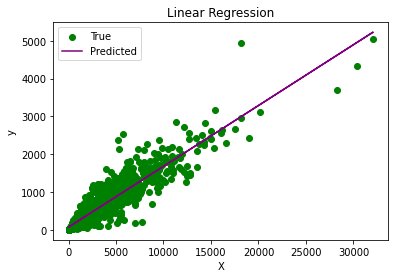

In [12]:
plt.scatter(x_test,y_test, label='True', color='green')
plt.plot(x_test, predictions, label='Predicted', color='purple')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()


Performing classification on the same dataset

Checking if based on median house value and total rooms, will the house be near a water body or will it be inland

Positive - Inland
Negative - Near Water body

In [13]:
from sklearn.naive_bayes import GaussianNB


X = df[['median_house_value','total_rooms']]
y = df['ocean_proximity'].apply(lambda x: 'INLAND' if x==2 else 'NEAR_WATER_BODY')

x_train,x_test,y_train,y_test = train_test_split(X,y)

gnb = GaussianNB().fit(x_train,y_train)

accuracy = gnb.score(x_test,y_test)
print("Accuracy: ",accuracy)

Accuracy:  0.8009689922480621


Measuing performance

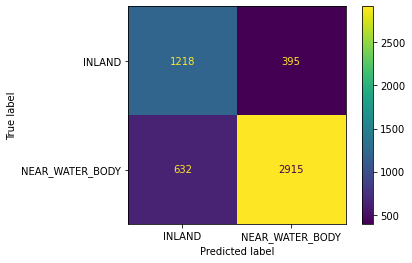

AUC-ROC score:  0.788
F1 Score:  0.703


In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score, roc_auc_score


predictions = gnb.predict(x_test)
cm = confusion_matrix(y_test,predictions, labels=gnb.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gnb.classes_)
disp.plot()
plt.show()


pred_numerical = list(map(lambda x: 1 if x=='INLAND' else 0,predictions))

auc_roc = roc_auc_score(y_test.apply(lambda x: 1 if x=='INLAND' else 0),pred_numerical)
print("AUC-ROC score: ",auc_roc.round(3))

f1 = f1_score(y_test,predictions,pos_label='INLAND')
print('F1 Score: ', f1.round(3))

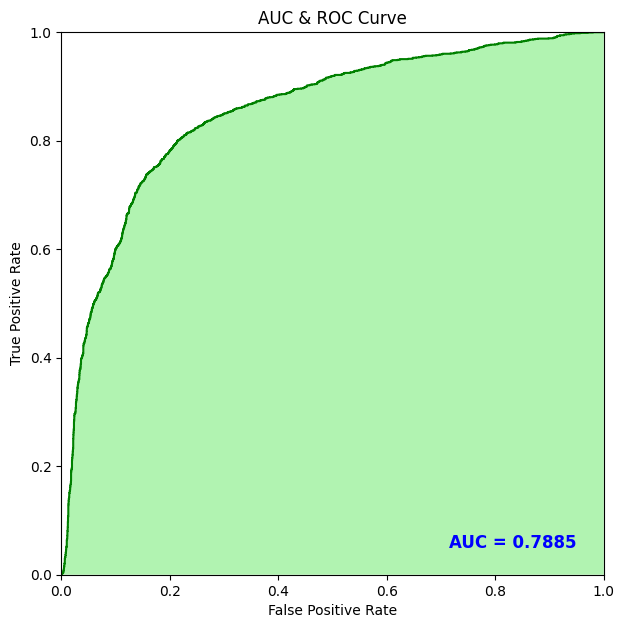

In [15]:
from sklearn.metrics import roc_curve

predictions_prob = gnb.predict_proba(x_test)[:,0]

false_positive_rate, true_positive_rate, thresolds = roc_curve(y_test.to_numpy(), predictions_prob,pos_label='INLAND')

plt.figure(figsize=(7, 15), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc_roc, ha='right', fontsize=12, weight='bold', color='blue')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Distribution curve<br>
Kernel Density Estimateion (KDE) has also been set to true where kde is a non-parametric way to estimate the probablity density function (PDF) 

The area where the chance of a random value falling in, is highest, has also been marked

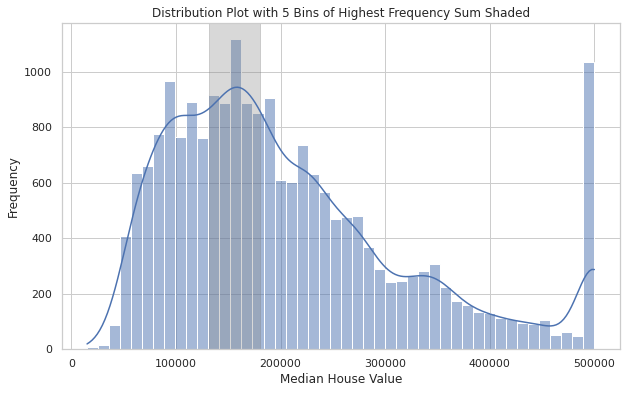

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='median_house_value', kde=True)

hist, edges = np.histogram(df['median_house_value'], bins=50)

num_bins_to_shade = 5
sum_frequencies = np.convolve(hist, np.ones(num_bins_to_shade), mode='valid')

starting_bin_index = np.argmax(sum_frequencies)

lower_bound = edges[starting_bin_index]
upper_bound = edges[starting_bin_index + num_bins_to_shade]

plt.axvspan(lower_bound, upper_bound, color='gray', alpha=0.3)

plt.title("Distribution Plot with 5 Bins of Highest Frequency Sum Shaded")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()
